## PROJECT ON FLIPKART MOBILES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re

### 1. Web-Scraping

In [3]:
URL='https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1'



In [4]:
page=requests.get(URL)

In [5]:
page.status_code

200

In [6]:

pagecontant=page.text
#pagecontant

In [6]:
soup=BeautifulSoup(pagecontant)

In [7]:
soup.find_all('div',attrs = {'class':'_1YokD2 _3Mn1Gg'})

[<div class="_1YokD2 _3Mn1Gg" style="flex:0 0 280px;max-width:280px;padding:0px 10px 0px 0px"><div class="_1YokD2 _3Mn1Gg col-12-12"><div class="_1AtVbE col-12-12"><div class="_1KOcBL"><section class="JWMl0H _2hbLCH"><div class="_2ssEMF"><div class="_3V8rao"><span>Filters</span></div></div></section><div class="_2q_g77"><section class="_2aDURW"><div class="_2lfNTw"><span>CATEGORIES</span></div><div><div class="TB_InB"><span><svg class="_2Iqv73" height="10" viewbox="0 0 16 27" width="10" xmlns="http://www.w3.org/2000/svg"><path class="_3zK8He" d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff"></path></svg></span><a class="_2qvBBJ _2Mji8F" href="/mobiles-accessories/pr?sid=tyy&amp;q=mobiles&amp;otracker=categorytree" title="Mobiles &amp; Accessories">Mobiles &amp; Accessories</a></div></div><div><div class="TB_InB"><span><svg class="_2Iqv73" height="10" viewbox="0 0 16 27" width="10" xmlns="http://www.w3.org/2000/svg"><path class="" d="M16 23.207L6.11 13.16

In [8]:
### RATING OF ALL MOBILES
List_1=soup.find_all('div',attrs = {'class':'gUuXy-'})
for i in List_1:
    rating=i.find('span',attrs={'class':'_2_R_DZ'})
    print(rating.text)

40,797 Ratings & 2,501 Reviews
26,855 Ratings & 1,822 Reviews
26,855 Ratings & 1,822 Reviews
40,797 Ratings & 2,501 Reviews
2,84,829 Ratings & 16,101 Reviews
7,867 Ratings & 472 Reviews
2,84,829 Ratings & 16,101 Reviews
32,353 Ratings & 2,423 Reviews
4,13,688 Ratings & 32,183 Reviews
4,13,688 Ratings & 32,183 Reviews
32,353 Ratings & 2,423 Reviews
1,31,464 Ratings & 9,857 Reviews
32,353 Ratings & 2,423 Reviews
4,13,688 Ratings & 32,183 Reviews
4,13,688 Ratings & 32,183 Reviews
26,410 Ratings & 1,459 Reviews
1,31,464 Ratings & 9,857 Reviews
1,63,810 Ratings & 10,209 Reviews
30,455 Ratings & 2,272 Reviews
7,867 Ratings & 472 Reviews
30,455 Ratings & 2,272 Reviews
1,31,464 Ratings & 9,857 Reviews
1,56,732 Ratings & 13,283 Reviews
1,56,732 Ratings & 13,283 Reviews


In [9]:
price_list = []
product_list = []
rating_list = []
features_list = []
no_ratings_list = []
Orgprice_list = []
brand_list = []
for i in range(1,50):
    URL = 'https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    list_1 = soup.find_all('div',attrs = {'class':'_3pLy-c row'})
    for j in list_1:
        price = j.find('div', attrs = {'class':'_30jeq3 _1_WHN1'})
        if price is None:
            price_list.append(np.NaN)
        else:
            price_list.append(price.text)
        product = j.find('div',attrs={'class':'_4rR01T'})
        if product is None:
                product_list.append(np.NaN)
        else:
            product_list.append(product.text)

        rating = j.find('div',attrs={'class':'_3LWZlK'})
        if rating is None:
            rating_list.append(np.NaN)
        else:
            rating_list.append(rating.text)

        features = j.find('ul',attrs={'class':'_1xgFaf'})
        if features is None:
            features_list.append(np.NaN)
        else:
            features_list.append(features.text)
        ratings = j.find('span',attrs={'class':'_2_R_DZ'})
        if no_ratings_list is None:
            no_ratings_list.append(np.NaN)
        else:
            no_ratings_list.append(ratings.text)
        Orgprice = j.find('div',attrs={'class':'_3I9_wc _27UcVY'})
        if Orgprice is None:
            Orgprice_list.append(np.NaN)
        else:
            Orgprice_list.append(Orgprice.text) 

In [10]:
len(price_list)

1176

In [11]:
mobiles = pd.DataFrame({'Price':price_list,'Product':product_list,'Features':features_list,'Ratings':rating_list,'ratings_rew':no_ratings_list,'orgprice':Orgprice_list})

mobiles

,Price,Product,Features,Ratings,ratings_rew,orgprice
0,"₹8,999","realme Narzo 30A (Laser Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,"40,797 Ratings & 2,501 Reviews","₹10,999"
1,"₹7,999","realme Narzo 30A (Laser Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.4,"26,855 Ratings & 1,822 Reviews","₹9,999"
2,"₹7,999","realme Narzo 30A (Laser Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.4,"26,855 Ratings & 1,822 Reviews","₹9,999"
3,"₹8,999","realme Narzo 30A (Laser Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,4.4,"40,797 Ratings & 2,501 Reviews","₹10,999"
4,"₹7,999","REDMI 9i (Sea Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.3,"2,84,829 Ratings & 16,101 Reviews","₹9,999"
...,...,...,...,...,...,...
1171,"₹10,999","REDMI Note 9 (Pebble Grey, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,4.4,"30,461 Ratings & 2,273 Reviews","₹14,999"
1172,"₹11,999","POCO M3 (Cool Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,4.3,"1,31,476 Ratings & 9,858 Reviews","₹14,999"
1173,"₹7,499","Infinix Smart 4 Plus (Quetzal Cyan, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.4,"1,56,736 Ratings & 13,283 Reviews","₹9,999"
1174,"₹7,499","Infinix Smart 4 Plus (Midnight Black, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 256 GB1...,4.4,"1,56,736 Ratings & 13,283 Reviews","₹9,999"


In [12]:
mobiles['Processor'] = mobiles['Features'].apply(lambda x:re.compile('\s*[A-Za-z0-9]*\s*[A-Z0-9]*\sProcessor').search(x).group().replace('Processor',''))
mobiles['Battry_Type'] = mobiles['Features'].apply(lambda x:re.compile('Battery[A-Za-z]+').search(x).group().replace('Battery',''))
mobiles['Display'] = mobiles['Features'].apply(lambda x:re.compile('\s\(\d\.\d\d*\s[a-z]+').search(x).group().replace('(',''))
mobiles['RAM'] = mobiles['Features'].apply(lambda x:re.compile('\d\s[A-Z]+').search(x).group())
mobiles['Warrenty'] = mobiles['Features'].apply(lambda x:re.compile('\s\d\s[A-Za-z]*').search(x).group())
mobiles['ROM'] = mobiles['Features'].apply(lambda x:re.compile('\s[0-9]+\s[A-Z]+').search(x).group())
mobiles['Battery'] = mobiles['Features'].apply(lambda x:re.compile('\d{4,}\s\w{3,}').search(x).group())
mobiles['Product_Name'] = mobiles['Product'].apply(lambda x:re.compile('[A-Z\sa-z0-9]*').search(x).group())
mobiles['Display_Size'] = mobiles['Features'].apply(lambda x:re.compile('\d\d\.\d\d\s\w\w').search(x).group())
mobiles['Rear_cam'] = mobiles['Features'].apply(lambda x:re.compile('\d\d\w\w\s').search(x).group())
mobiles['Colour'] = mobiles['Product'].apply(lambda x:re.compile('\s[\W(][A-Za-z\s]+').search(x).group().replace('(',''))
mobiles['No_reviews'] = mobiles['ratings_rew'].apply(lambda x:re.compile('[0-9\,]+\sReviews').search(x).group().replace('Reviews',''))
mobiles['No_ratings'] = mobiles['ratings_rew'].apply(lambda x:re.compile('[0-9\,]+').search(x).group())

In [13]:
mobiles['Price'] = mobiles['Price'].apply(lambda x:x.replace('₹',''))
mobiles['Warrenty'] = mobiles['Warrenty'].apply(lambda x:x.replace('Year',''))
mobiles['RAM'] = mobiles['RAM'].apply(lambda x:x.replace('GB',''))
mobiles['ROM'] = mobiles['ROM'].apply(lambda x:x.replace('GB',''))
mobiles['Rear_cam'] = mobiles['Rear_cam'].apply(lambda x:x.replace('5000','8'))
mobiles['Battery'] = mobiles['Battery'].apply(lambda x:x.replace('mAh',''))
mobiles['Rear_cam'] = mobiles['Rear_cam'].apply(lambda x:x.replace('MP',''))
mobiles['Display'] = mobiles['Display'].apply(lambda x:x.replace('inch',''))
mobiles['orgprice'] = mobiles['orgprice'].astype(str)
mobiles['orgprice'] = [x.replace('₹','') for x in mobiles['orgprice']]
mobiles['Warrenty'] = mobiles['Warrenty'].apply(lambda x:x.replace('Months',''))
mobiles['Warrenty'] = mobiles['Warrenty'].apply(lambda x:x.replace('months',''))

In [14]:
mobiles.drop('Product',axis = 1,inplace = True)
mobiles.drop('Features',axis = 1,inplace = True)
mobiles.drop('Display_Size',axis = 1,inplace = True)
mobiles.drop('ratings_rew',axis = 1,inplace = True)

In [15]:
mobiles = mobiles[['Product_Name','orgprice','Price','Processor','Battry_Type','Ratings','No_ratings','No_reviews','Warrenty','Colour','Battery','RAM','ROM','Display','Rear_cam']]

In [16]:
mobiles.head(6)

,Product_Name,orgprice,Price,Processor,Battry_Type,Ratings,No_ratings,No_reviews,Warrenty,Colour,Battery,RAM,ROM,Display,Rear_cam
0,realme Narzo 30A,"10,999","8,999",Helio G85,MediaTek,4.4,"40,797","2,501",6,Laser Blue,6000,4,64,6.51,13
1,realme Narzo 30A,"9,999","7,999",Helio G85,MediaTek,4.4,"26,855","1,822",6,Laser Black,6000,3,32,6.51,13
2,realme Narzo 30A,"9,999","7,999",Helio G85,MediaTek,4.4,"26,855","1,822",6,Laser Blue,6000,3,32,6.51,13
3,realme Narzo 30A,"10,999","8,999",Helio G85,MediaTek,4.4,"40,797","2,501",6,Laser Black,6000,4,64,6.51,13
4,REDMI 9i,"9,999","7,999",Helio G25,MediaTek,4.3,"2,84,829","16,101",1,Sea Blue,5000,4,64,6.53,13
5,OPPO A53,"17,990","12,990",Snapdragon 460,Qualcomm,4.4,"7,867",472,1,Mint Cream,5000,6,128,6.5,13


In [17]:
mobiles.to_csv("mobiles.csv")

In [18]:
mobiles = pd.read_csv(r"mobiles.csv")
mobiles.head(6)

,Unnamed: 0,Product_Name,orgprice,Price,Processor,Battry_Type,Ratings,No_ratings,No_reviews,Warrenty,Colour,Battery,RAM,ROM,Display,Rear_cam
0,0,realme Narzo 30A,"10,999","8,999",Helio G85,MediaTek,4.4,"40,797","2,501",6,Laser Blue,6000,4,64,6.51,13
1,1,realme Narzo 30A,"9,999","7,999",Helio G85,MediaTek,4.4,"26,855","1,822",6,Laser Black,6000,3,32,6.51,13
2,2,realme Narzo 30A,"9,999","7,999",Helio G85,MediaTek,4.4,"26,855","1,822",6,Laser Blue,6000,3,32,6.51,13
3,3,realme Narzo 30A,"10,999","8,999",Helio G85,MediaTek,4.4,"40,797","2,501",6,Laser Black,6000,4,64,6.51,13
4,4,REDMI 9i,"9,999","7,999",Helio G25,MediaTek,4.3,"2,84,829","16,101",1,Sea Blue,5000,4,64,6.53,13
5,5,OPPO A53,"17,990","12,990",Snapdragon 460,Qualcomm,4.4,"7,867",472,1,Mint Cream,5000,6,128,6.50,13


##  2.EDA Process

### i.Missing values

In [19]:
mobiles.isnull().sum()

Unnamed: 0      0
Product_Name    0
orgprice        0
Price           0
Processor       0
Battry_Type     0
Ratings         0
No_ratings      0
No_reviews      0
Warrenty        0
Colour          0
Battery         0
RAM             0
ROM             0
Display         0
Rear_cam        0
dtype: int64

In [20]:
mobiles.shape

(1176, 16)

In [21]:
mobiles.isna().sum()

Unnamed: 0      0
Product_Name    0
orgprice        0
Price           0
Processor       0
Battry_Type     0
Ratings         0
No_ratings      0
No_reviews      0
Warrenty        0
Colour          0
Battery         0
RAM             0
ROM             0
Display         0
Rear_cam        0
dtype: int64

In [22]:
mobiles[mobiles.orgprice.isnull()]

,Unnamed: 0,Product_Name,orgprice,Price,Processor,Battry_Type,Ratings,No_ratings,No_reviews,Warrenty,Colour,Battery,RAM,ROM,Display,Rear_cam


In [23]:
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1176 non-null   int64  
 1   Product_Name  1176 non-null   object 
 2   orgprice      1176 non-null   object 
 3   Price         1176 non-null   object 
 4   Processor     1176 non-null   object 
 5   Battry_Type   1176 non-null   object 
 6   Ratings       1176 non-null   float64
 7   No_ratings    1176 non-null   object 
 8   No_reviews    1176 non-null   object 
 9   Warrenty      1176 non-null   object 
 10  Colour        1176 non-null   object 
 11  Battery       1176 non-null   int64  
 12  RAM           1176 non-null   int64  
 13  ROM           1176 non-null   int64  
 14  Display       1176 non-null   float64
 15  Rear_cam      1176 non-null   int64  
dtypes: float64(2), int64(5), object(9)
memory usage: 147.1+ KB


### ii.Duplicated rows

In [24]:
mobiles.duplicated().sum()

0

### iii.Invalid values

In [25]:
# Converting Price into int:

p=[]
for i in mobiles['Price']:
    p.append(i.replace(',',''))
p=pd.Series(p)
p=pd.to_numeric(p)
type(p)
mobiles['Price']=p
mobiles['Price'][153]

11999

In [26]:
# Converting Orgprice into int:

q = []
for i in mobiles['orgprice']:
    q.append(i.replace(',',''))
q = pd.Series(q)
q=pd.to_numeric(q)
type(q)
mobiles['orgprice'] = q
mobiles['orgprice'][143]

23999

In [27]:
# Converting No_ratings into int:

a = []
for i in mobiles['No_ratings']:
    a.append(i.replace(',',''))
a = pd.Series(a)
a=pd.to_numeric(a)
type(a)
mobiles['No_ratings'] = a
mobiles['No_ratings'][143]

11121

In [28]:
# Converting No_ratings into int:

b = []
for i in mobiles['No_reviews']:
    b.append(i.replace(',',''))
b = pd.Series(b)
b = pd.to_numeric(b)
type(b)
mobiles['No_reviews'] = b
mobiles['No_reviews'][143]

1139

In [29]:
mobiles.dtypes

Unnamed: 0        int64
Product_Name     object
orgprice          int64
Price             int64
Processor        object
Battry_Type      object
Ratings         float64
No_ratings        int64
No_reviews        int64
Warrenty         object
Colour           object
Battery           int64
RAM               int64
ROM               int64
Display         float64
Rear_cam          int64
dtype: object

### iv. Outlier detection

In [30]:
sorted(mobiles)
q1 = mobiles.quantile(numeric_only = True, axis = 0, q = 0.25)
q3 = mobiles.quantile(numeric_only = True, axis = 0, q = 0.75)
iqr = q3 - q1
iqr
mobiles.shape

(1176, 16)

In [31]:
mobiles = mobiles[~((mobiles <= (q1 - 1.5*iqr)) | (mobiles >= (q3 + 1.5*iqr))).any(axis = 1)]
mobiles.shape

(882, 16)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

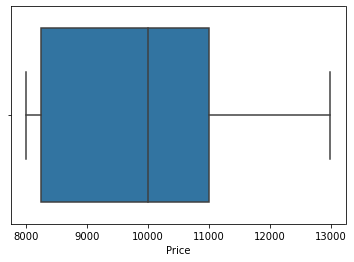

In [32]:
sns.boxplot(mobiles.Price)

### v. Visualization

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ratings', ylabel='count'>

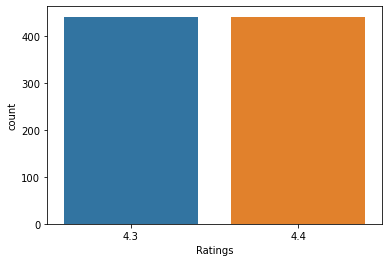

In [33]:
sns.countplot(mobiles.Ratings)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='count'>

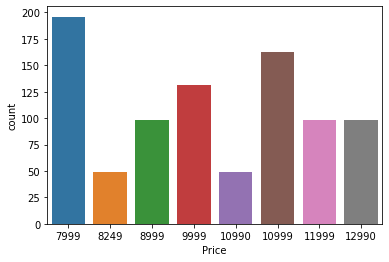

In [34]:
sns.countplot(mobiles.Price)

<AxesSubplot:xlabel='Product_Name', ylabel='Display'>

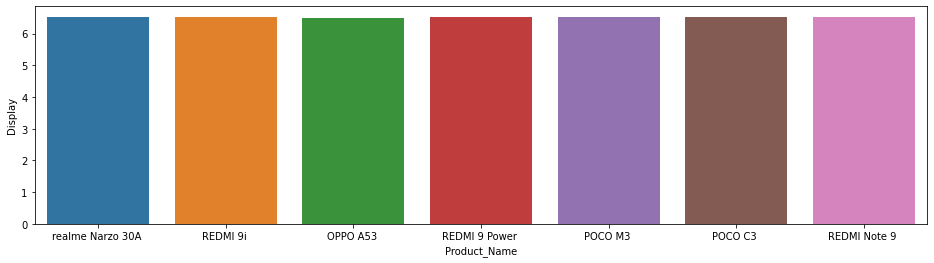

In [35]:
plt.figure(figsize = (16,4))
sns.barplot(data=mobiles,x='Product_Name',y='Display')

<AxesSubplot:xlabel='Product_Name', ylabel='RAM'>

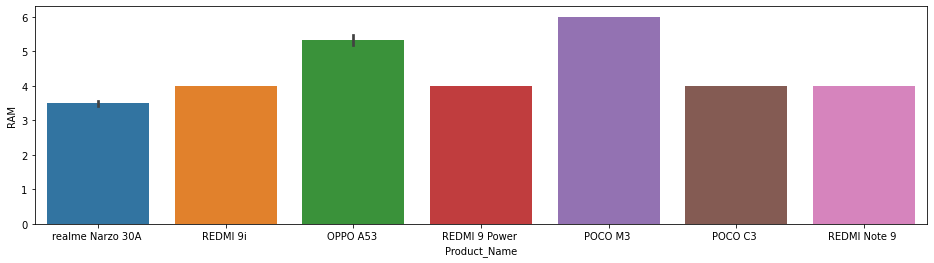

In [36]:
plt.figure(figsize = (16,4))
sns.barplot(data=mobiles,x='Product_Name',y='RAM')

<AxesSubplot:xlabel='Product_Name', ylabel='ROM'>

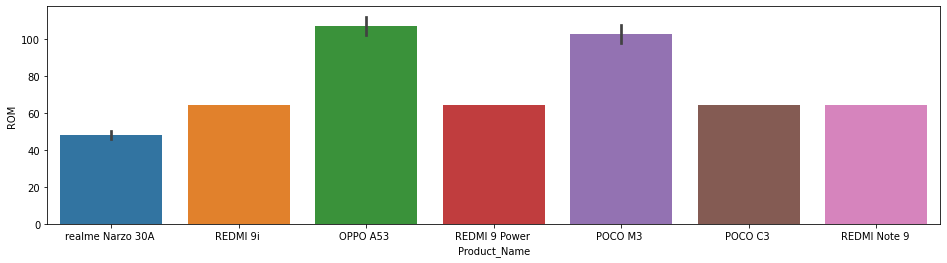

In [37]:
plt.figure(figsize = (16,4))
sns.barplot(data=mobiles,x='Product_Name',y='ROM')

<AxesSubplot:xlabel='Product_Name', ylabel='Battery'>

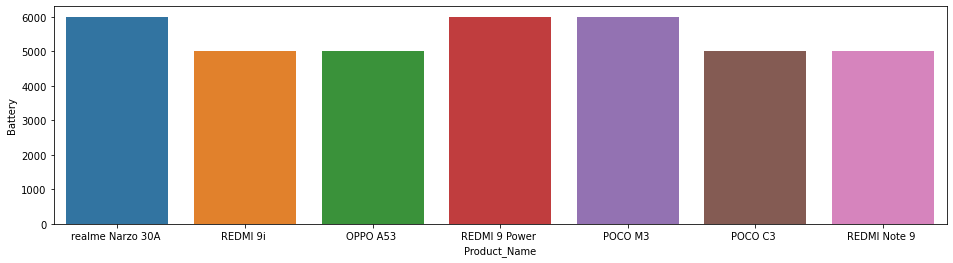

In [38]:
plt.figure(figsize = (16,4))
sns.barplot(data=mobiles,x='Product_Name',y='Battery')

<AxesSubplot:xlabel='Product_Name', ylabel='Rear_cam'>

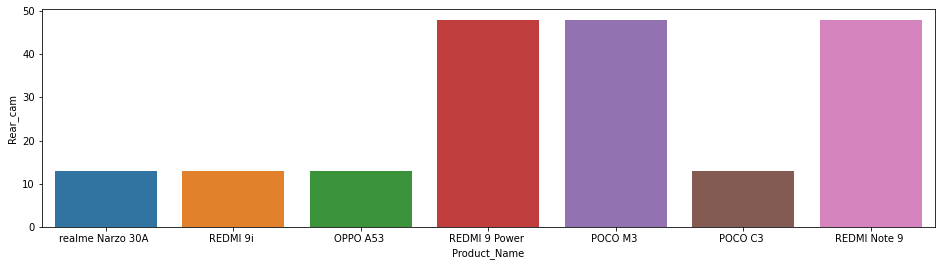

In [39]:
plt.figure(figsize = (16,4))
sns.barplot(data=mobiles,x='Product_Name',y='Rear_cam')

<AxesSubplot:xlabel='Product_Name', ylabel='No_ratings'>

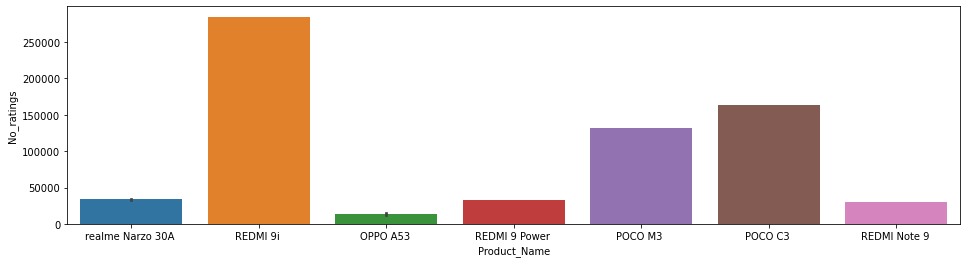

In [40]:
plt.figure(figsize = (16,4))
sns.barplot(data = mobiles, x = 'Product_Name', y = 'No_ratings')

<AxesSubplot:xlabel='Product_Name', ylabel='No_reviews'>

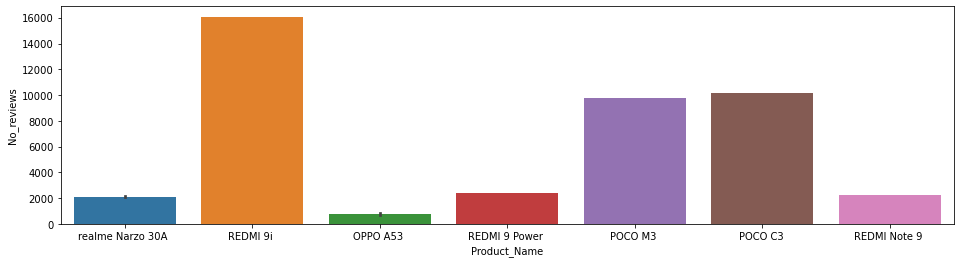

In [41]:
plt.figure(figsize = (16,4))
sns.barplot(data = mobiles,x = 'Product_Name', y = 'No_reviews')

<AxesSubplot:xlabel='Product_Name', ylabel='orgprice'>

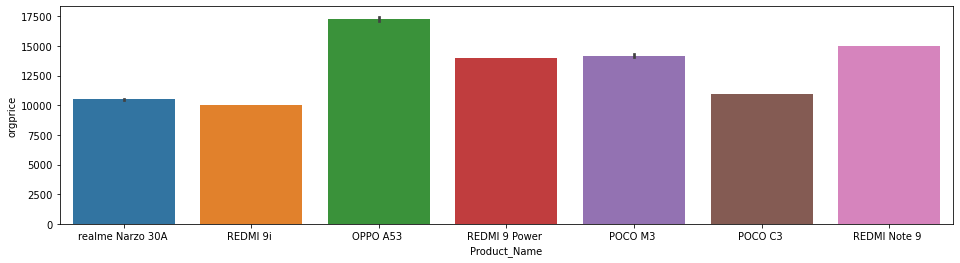

In [42]:
plt.figure(figsize = (16,4))
sns.barplot(data = mobiles,x = 'Product_Name', y = 'orgprice')

<AxesSubplot:xlabel='Product_Name', ylabel='Price'>

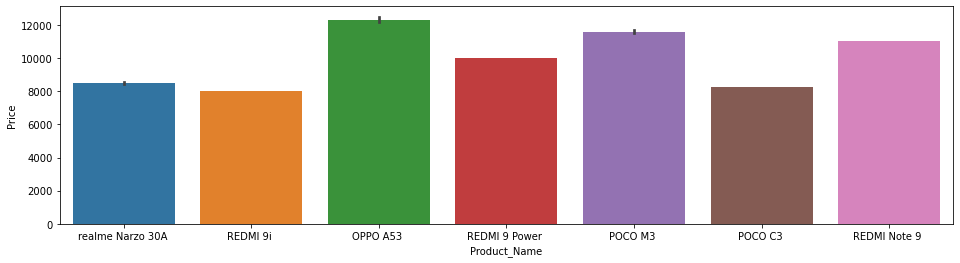

In [43]:
plt.figure(figsize = (16,4))
sns.barplot(data = mobiles,x = 'Product_Name', y = 'Price')

### By plotting above grpahs(data visualization) i came to an conclusion that  these two Mobiles has Better Features


### 1. REDME 9 POWER

---IT'S ORGNAL PRICE 9,999

---IT'S OFFER PRICE  7,999

### 2. POCO M3

---IT'S ORGINAL PRICE 14,999   

---IT'S OFFER PRICE 11,999